In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold,learning_curve
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import matplotlib.pyplot as plt
import time
from scipy import stats
from tqdm import tqdm

In [1]:
# Load the data
mb_raw_data = pd.read_csv('../data/mann_bruker.txt', sep='\t')

# Keep only necessary columns
mb_clean_frame = mb_raw_data[['Sequence', 'CCS','Mass','Charge','Length']]

mb_clean_frame_grouped = mb_clean_frame.groupby(['Sequence', 'Charge']).agg({'Mass':'median', 'CCS':'median','Length':'median'}).reset_index()

    

def calculate_percent_error(row):
    sequence = row['Sequence']
    charge = row['Charge']
    ccs = row['CCS']
    
    # Find the respective sequence and charge in the grouped dataset
    grouped_row = mb_clean_frame_grouped[(mb_clean_frame_grouped['Sequence'] == sequence) & (mb_clean_frame_grouped['Charge'] == charge)]
    
    # Calculate the percent error of ccs
    percent_error = abs((ccs - grouped_row['CCS'].values[0]) / grouped_row['CCS'].values[0]) * 100
    
    return percent_error
tqdm.pandas()
# Apply the function to each row in the dataframe
mb_clean_frame['Percent_Error_CCS'] = mb_clean_frame.progress_apply(calculate_percent_error, axis=1)



NameError: name 'pd' is not defined

In [9]:
print(mb_clean_frame['Percent_Error_CCS'].max())

98.9091245913548


In [13]:
print(mb_clean_frame[mb_clean_frame['Percent_Error_CCS'] != 0]['Percent_Error_CCS'].mean())

0.5883513145535384


In [14]:
print(mb_clean_frame[mb_clean_frame['Percent_Error_CCS'] != 0]['Percent_Error_CCS'].median())

0.12147320106164265


In [6]:
mb_clean_frame

,Sequence,CCS,Mass,Charge,Length,Percent_Error_CCS
0,AAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGP...,2.654046e-35,4401.106890,4,52,0.000000
1,AAAAAAAAAK,5.996674e-36,785.439552,1,10,0.111098
2,AAAAAAAAAK,5.956918e-36,785.439552,1,10,0.552614
3,AAAAAAAAAK,5.996673e-36,785.439552,1,10,0.111081
4,AAAAAAAAAK,5.970114e-36,785.439552,1,10,0.332315
...,...,...,...,...,...,...
440757,YYYQGCASWK,1.742139e-35,1324.554660,2,10,0.000000
440758,YYYVCQYCPAMKTYLNK,2.726609e-35,2264.010450,3,17,0.000006
440759,YYYVCQYCPAMKTYLNK,2.726609e-35,2264.010450,3,17,0.000006
440760,YYYVPADFVEYEK,1.524399e-35,1684.766090,2,13,0.000020


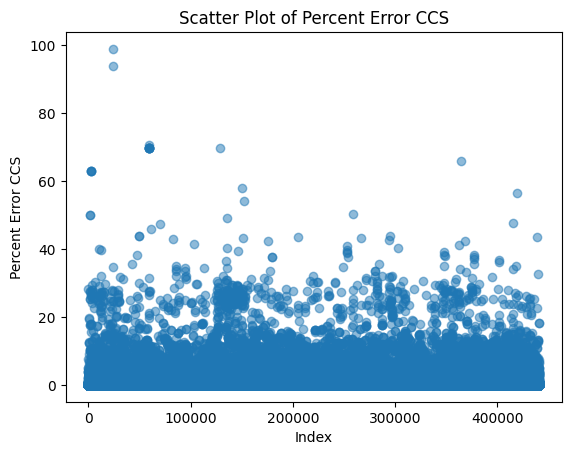

In [14]:
# Create a scatter plot of the 'Percent_Error_CCS' column with alpha
plt.scatter(mb_clean_frame.index, mb_clean_frame['Percent_Error_CCS'], alpha=0.5)

# Add a title and labels
plt.title('Scatter Plot of Percent Error CCS')
plt.xlabel('Index')
plt.ylabel('Percent Error CCS')

# Show the plot
plt.show()


In [16]:
mb_clean_frame.to_csv('../data/mann_bruker_error.txt', sep='\t', index=False)

In [3]:
mb_clean_frame = pd.read_csv('../data/mann_bruker_error.txt', sep='\t')

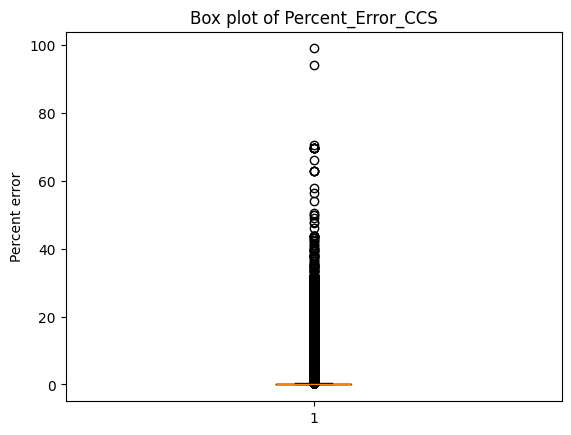

<Figure size 2400x1800 with 0 Axes>

In [16]:

# Assuming 'mb_clean_frame' is your DataFrame and 'Percent_Error_CCS' is your column
data = mb_clean_frame['Percent_Error_CCS']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a box plot
ax.boxplot(data)

# Set the labels for x and y axis

ax.set_ylabel('Percent error')

# Set the title of the plot
ax.set_title('Box plot of Percent_Error_CCS')

# Set the DPI to display (not save)
plt.figure(figsize=(8, 6), dpi=300)
plt.show()


In [3]:
# Load the data
mb_raw_data = pd.read_csv('../data/mann_bruker.txt', sep='\t')

# Keep only necessary columns
mb_clean_frame = mb_raw_data[['Sequence', 'CCS','Mass','Charge','Length']]

mb_clean_frame_grouped = mb_clean_frame.groupby(['Sequence', 'Charge']).agg({'Mass':'median', 'CCS':'median','Length':'median'}).reset_index()


/var/folders/h8/62vn1gzj3456t6qsdpq7mx3w0000gn/T/ipykernel_23434/3715333760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mb_clean_frame['CCS_ln'] = np.log(mb_clean_frame['CCS'])


(array([3.9707e+04, 3.7487e+04, 2.3214e+04, 1.1056e+04, 5.6900e+03,
        2.1710e+03, 4.9700e+02, 2.3200e+02, 1.7700e+02, 1.0200e+02,
        3.7000e+01, 1.9000e+01, 7.0000e+00, 5.4800e+02, 1.6580e+03,
        3.5870e+03, 5.5540e+03, 7.5440e+03, 1.0014e+04, 1.0636e+04,
        1.2592e+04, 1.3474e+04, 1.3142e+04, 1.3246e+04, 1.4141e+04,
        1.3580e+04, 1.3621e+04, 1.2947e+04, 1.3412e+04, 1.0925e+04,
        1.0937e+04, 9.4860e+03, 8.6810e+03, 7.6080e+03, 6.2360e+03,
        5.9980e+03, 4.7590e+03, 4.2120e+03, 3.7290e+03, 3.2290e+03,
        2.7900e+03, 2.4890e+03, 2.2360e+03, 2.5840e+03, 2.8420e+03,
        2.7210e+03, 3.2910e+03, 2.9400e+03, 3.1820e+03, 3.1910e+03,
        3.4470e+03, 3.3960e+03, 3.5130e+03, 3.4720e+03, 3.4700e+03,
        3.5070e+03, 3.5410e+03, 3.5740e+03, 3.2040e+03, 3.1960e+03,
        2.8730e+03, 3.0470e+03, 2.4100e+03, 2.0570e+03, 1.7720e+03,
        1.3990e+03, 1.0790e+03, 8.7700e+02, 7.5600e+02, 5.8500e+02,
        4.2400e+02, 4.5100e+02, 3.9200e+02, 4.33

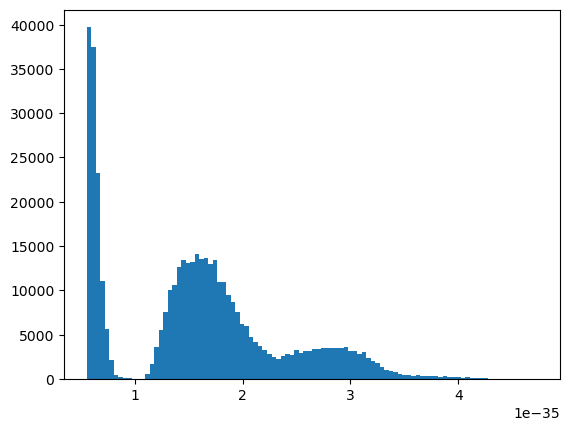

In [5]:
# normalize 
mb_clean_frame['CCS_ln'] = np.log(mb_clean_frame['CCS'])
# Bar plot of CCS
plt.hist(mb_clean_frame['CCS'], bins=100)

(array([9.4140e+03, 1.3051e+04, 1.2193e+04, 1.2775e+04, 1.2402e+04,
        1.1499e+04, 1.0414e+04, 8.6170e+03, 7.0720e+03, 5.5420e+03,
        4.1530e+03, 3.3690e+03, 2.8330e+03, 2.1460e+03, 1.7950e+03,
        1.2090e+03, 6.5900e+02, 4.0300e+02, 1.9100e+02, 1.1500e+02,
        1.0100e+02, 1.0100e+02, 9.0000e+01, 7.6000e+01, 6.4000e+01,
        4.0000e+01, 2.8000e+01, 1.2000e+01, 1.6000e+01, 9.0000e+00,
        6.0000e+00, 1.0000e+00, 1.9100e+02, 6.7700e+02, 9.8900e+02,
        1.5140e+03, 2.7690e+03, 3.3280e+03, 4.3680e+03, 5.2080e+03,
        6.4940e+03, 7.2540e+03, 8.0900e+03, 9.1290e+03, 9.3100e+03,
        1.0429e+04, 9.7200e+03, 1.0933e+04, 1.1206e+04, 1.1137e+04,
        1.2266e+04, 1.0826e+04, 1.1611e+04, 1.1520e+04, 1.0820e+04,
        1.0187e+04, 9.4880e+03, 8.8590e+03, 7.3320e+03, 6.5500e+03,
        6.3860e+03, 5.1080e+03, 4.6250e+03, 4.2210e+03, 3.5570e+03,
        3.0160e+03, 3.0030e+03, 2.9500e+03, 3.3770e+03, 3.6910e+03,
        3.8590e+03, 4.2030e+03, 4.3080e+03, 4.77

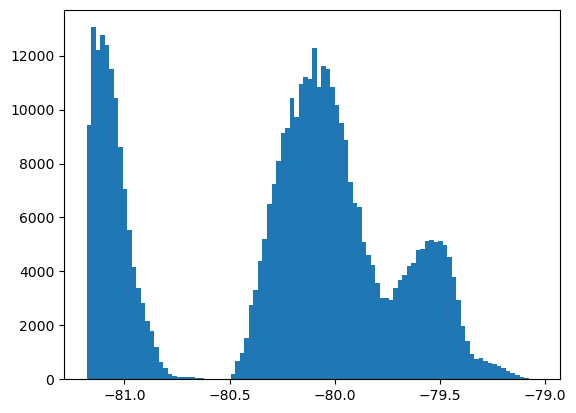

In [6]:
plt.hist(mb_clean_frame['CCS_ln'], bins=100)


/var/folders/h8/62vn1gzj3456t6qsdpq7mx3w0000gn/T/ipykernel_23434/1700430649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mb_clean_frame['CCS_zscore'] = stats.zscore(mb_clean_frame['CCS'])


(array([3.9707e+04, 3.7487e+04, 2.3214e+04, 1.1056e+04, 5.6900e+03,
        2.1710e+03, 4.9700e+02, 2.3200e+02, 1.7700e+02, 1.0200e+02,
        3.7000e+01, 1.9000e+01, 7.0000e+00, 5.4800e+02, 1.6580e+03,
        3.5870e+03, 5.5540e+03, 7.5440e+03, 1.0014e+04, 1.0636e+04,
        1.2592e+04, 1.3474e+04, 1.3142e+04, 1.3246e+04, 1.4141e+04,
        1.3580e+04, 1.3621e+04, 1.2947e+04, 1.3412e+04, 1.0925e+04,
        1.0937e+04, 9.4860e+03, 8.6810e+03, 7.6080e+03, 6.2360e+03,
        5.9980e+03, 4.7590e+03, 4.2120e+03, 3.7290e+03, 3.2290e+03,
        2.7900e+03, 2.4890e+03, 2.2360e+03, 2.5840e+03, 2.8420e+03,
        2.7210e+03, 3.2910e+03, 2.9400e+03, 3.1820e+03, 3.1910e+03,
        3.4470e+03, 3.3960e+03, 3.5130e+03, 3.4720e+03, 3.4700e+03,
        3.5070e+03, 3.5410e+03, 3.5740e+03, 3.2040e+03, 3.1960e+03,
        2.8730e+03, 3.0470e+03, 2.4100e+03, 2.0570e+03, 1.7720e+03,
        1.3990e+03, 1.0790e+03, 8.7700e+02, 7.5600e+02, 5.8500e+02,
        4.2400e+02, 4.5100e+02, 3.9200e+02, 4.33

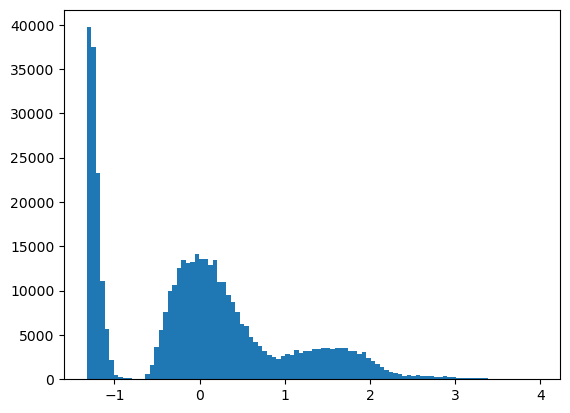

In [8]:
mb_clean_frame['CCS_zscore'] = stats.zscore(mb_clean_frame['CCS'])
plt.hist(mb_clean_frame['CCS_zscore'], bins=100)

/var/folders/h8/62vn1gzj3456t6qsdpq7mx3w0000gn/T/ipykernel_23434/549233738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mb_clean_frame['CCS_minmax'] = (mb_clean_frame['CCS'] - mb_clean_frame['CCS'].min()) / (mb_clean_frame['CCS'].max() - mb_clean_frame['CCS'].min())


(array([3.9707e+04, 3.7487e+04, 2.3214e+04, 1.1056e+04, 5.6900e+03,
        2.1710e+03, 4.9700e+02, 2.3200e+02, 1.7700e+02, 1.0200e+02,
        3.7000e+01, 1.9000e+01, 7.0000e+00, 5.4800e+02, 1.6580e+03,
        3.5870e+03, 5.5540e+03, 7.5440e+03, 1.0014e+04, 1.0636e+04,
        1.2592e+04, 1.3474e+04, 1.3142e+04, 1.3246e+04, 1.4141e+04,
        1.3580e+04, 1.3621e+04, 1.2947e+04, 1.3412e+04, 1.0925e+04,
        1.0937e+04, 9.4860e+03, 8.6810e+03, 7.6080e+03, 6.2360e+03,
        5.9980e+03, 4.7590e+03, 4.2120e+03, 3.7290e+03, 3.2290e+03,
        2.7900e+03, 2.4890e+03, 2.2360e+03, 2.5840e+03, 2.8420e+03,
        2.7210e+03, 3.2910e+03, 2.9400e+03, 3.1820e+03, 3.1910e+03,
        3.4470e+03, 3.3960e+03, 3.5130e+03, 3.4720e+03, 3.4700e+03,
        3.5070e+03, 3.5410e+03, 3.5740e+03, 3.2040e+03, 3.1960e+03,
        2.8730e+03, 3.0470e+03, 2.4100e+03, 2.0570e+03, 1.7720e+03,
        1.3990e+03, 1.0790e+03, 8.7700e+02, 7.5600e+02, 5.8500e+02,
        4.2400e+02, 4.5100e+02, 3.9200e+02, 4.33

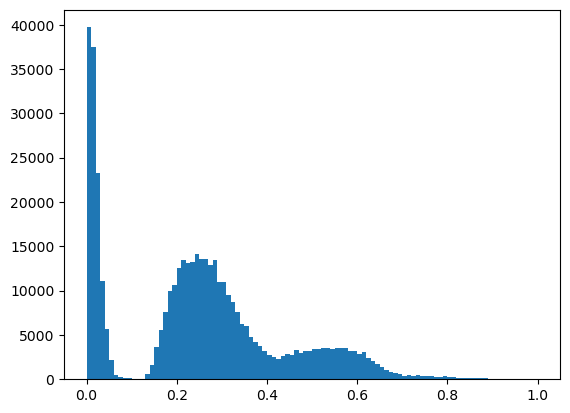

In [13]:
mb_clean_frame['CCS_minmax'] = (mb_clean_frame['CCS'] - mb_clean_frame['CCS'].min()) / (mb_clean_frame['CCS'].max() - mb_clean_frame['CCS'].min())
plt.hist(mb_clean_frame['CCS_minmax'], bins=100)
